# Project 2: Ames Housing Data

### Imports

In [1]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
pd.set_option('display.max_columns', None)

### Load in Train Data

In [2]:
pwd

'C:\\Users\\Jason\\Desktop\\ga dsi\\Submissions\\Projects\\project_2'

In [3]:
# Load in training csv file
train = pd.read_csv('datasets/train.csv')

In [4]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


### EDA

In [5]:
# Checking for nulls
train.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

In [6]:
# # Using msno to check for missing values
msno.bar(train, figsize=(28, 20), labels=list(train.columns));

In [7]:
# dropped all functions
train.drop(columns = ['MS SubClass', 
                      'MS Zoning',
                      'Lot Frontage', 
                      'Street', 
                      'Alley', 
                      'Lot Shape', 
                      'Land Contour', 
                      'Utilities', 
                      'Lot Config', 
                      'Land Slope', 
                      'Condition 1', 
                      'Condition 2', 
                      'Roof Style', 
                      'Roof Matl', 
                      'Exterior 1st',
                      'Exterior 2nd', 
                      'Mas Vnr Area',
                      'Mas Vnr Type',
                      'Exter Qual', 
                      'Bsmt Qual', 
                      'Bsmt Cond', 
                      'Bsmt Exposure', 
                      'BsmtFin Type 1', 
                      'BsmtFin Type 2',
                      'Heating', 
                      'Heating QC', 
                      'Central Air', 
                      'Electrical', 
                      'Functional', 
                      'Foundation', 
                      'Exter Cond', 
                      'House Style', 
                      'Pool QC', 
                      'Kitchen Qual', 
                      'Fireplace Qu', 
                      'Fence', 
                      'Sale Type', 
                      'Misc Feature', 
                     '3Ssn Porch', 
                     'Enclosed Porch', 
                     'Screen Porch', 
                     'Pool Area', 
                     'Misc Val', 
                     'Wood Deck SF', 
                     'Fireplaces', 
                     'Kitchen AbvGr', 
                      'TotRms AbvGrd', 
                      'Open Porch SF'
                     ], 
           inplace=True) 

In [9]:
# Lowercase and replace spaces with '_'. 
train.columns = [i.replace(' ', '_').lower() for i in train.columns]

In [10]:
# Check for nulls
train.isnull().sum()

id                   0
pid                  0
lot_area             0
neighborhood         0
bldg_type            0
overall_qual         0
overall_cond         0
year_built           0
year_remod/add       0
bsmtfin_sf_1         1
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
1st_flr_sf           0
2nd_flr_sf           0
low_qual_fin_sf      0
gr_liv_area          0
bsmt_full_bath       2
bsmt_half_bath       2
full_bath            0
half_bath            0
bedroom_abvgr        0
garage_type        113
garage_yr_blt      114
garage_finish      114
garage_cars          1
garage_area          1
garage_qual        114
garage_cond        114
paved_drive          0
mo_sold              0
yr_sold              0
saleprice            0
dtype: int64

In [11]:
# Fill all Nulls with 0
train.fillna(0, inplace=True)

In [12]:
# Final check of nulls
train.isnull().sum()

id                 0
pid                0
lot_area           0
neighborhood       0
bldg_type          0
overall_qual       0
overall_cond       0
year_built         0
year_remod/add     0
bsmtfin_sf_1       0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area        0
bsmt_full_bath     0
bsmt_half_bath     0
full_bath          0
half_bath          0
bedroom_abvgr      0
garage_type        0
garage_yr_blt      0
garage_finish      0
garage_cars        0
garage_area        0
garage_qual        0
garage_cond        0
paved_drive        0
mo_sold            0
yr_sold            0
saleprice          0
dtype: int64

In [13]:
# Checking datatypes in dataframe
train.dtypes

id                   int64
pid                  int64
lot_area             int64
neighborhood        object
bldg_type           object
overall_qual         int64
overall_cond         int64
year_built           int64
year_remod/add       int64
bsmtfin_sf_1       float64
bsmtfin_sf_2       float64
bsmt_unf_sf        float64
total_bsmt_sf      float64
1st_flr_sf           int64
2nd_flr_sf           int64
low_qual_fin_sf      int64
gr_liv_area          int64
bsmt_full_bath     float64
bsmt_half_bath     float64
full_bath            int64
half_bath            int64
bedroom_abvgr        int64
garage_type         object
garage_yr_blt      float64
garage_finish       object
garage_cars        float64
garage_area        float64
garage_qual         object
garage_cond         object
paved_drive         object
mo_sold              int64
yr_sold              int64
saleprice            int64
dtype: object

In [14]:
# Checking what's coming up in describe. Looking for outliers
train.describe()

,id,pid,lot_area,overall_qual,overall_cond,year_built,year_remod/add,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,garage_yr_blt,garage_cars,garage_area,mo_sold,yr_sold,saleprice
count,2051.000000,2.051000e+03,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,10065.208191,6.112140,5.562165,1971.708922,1984.190151,442.084837,47.935641,567.451487,1057.471965,1164.488055,329.329108,5.512921,1499.330083,0.427109,0.063384,1.577279,0.371039,2.843491,1868.725987,1.775719,473.440761,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,6742.488909,1.426271,1.104497,30.177889,21.036250,461.195041,164.964052,445.022846,449.908003,396.446923,425.671046,51.068870,500.447829,0.522589,0.251590,0.549279,0.501043,0.826618,454.133654,0.765357,216.135102,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1957.000000,1.000000,319.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,9430.000000,6.000000,5.000000,1974.000000,1993.000000,368.000000,0.000000,474.000000,994.000000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1978.000000,2.000000,480.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,11513.500000,7.000000,6.000000,2001.000000,2004.000000,733.500000,0.000000,811.000000,1318.500000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,2001.000000,2.000000,576.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,159000.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,2207.000000,5.000000,1418.000000,12.000000,2010.000000,611657.000000


## Feature Engineering

Source: Clint with debug assist on the dummies

In [18]:
# Create dummies. 
train = pd.get_dummies(train, columns=['garage_finish'], drop_first=False)
train = pd.get_dummies(train, columns=['garage_qual'], drop_first=False)
train = pd.get_dummies(train, columns=['garage_cond'], drop_first=False)
train = pd.get_dummies(train, columns=['paved_drive'], drop_first=False)
train = pd.get_dummies(train, columns=['garage_type'], drop_first=False)

In [19]:
# Setting up correlation and sorting by saleprice
corr = train.corr()
corr[['saleprice']].sort_values(by='saleprice', ascending=False)

,saleprice
saleprice,1.000000
overall_qual,0.800207
gr_liv_area,0.697038
garage_area,0.649897
garage_cars,0.647781
total_bsmt_sf,0.629303
1st_flr_sf,0.618486
year_built,0.571849
year_remod/add,0.550370
full_bath,0.537969


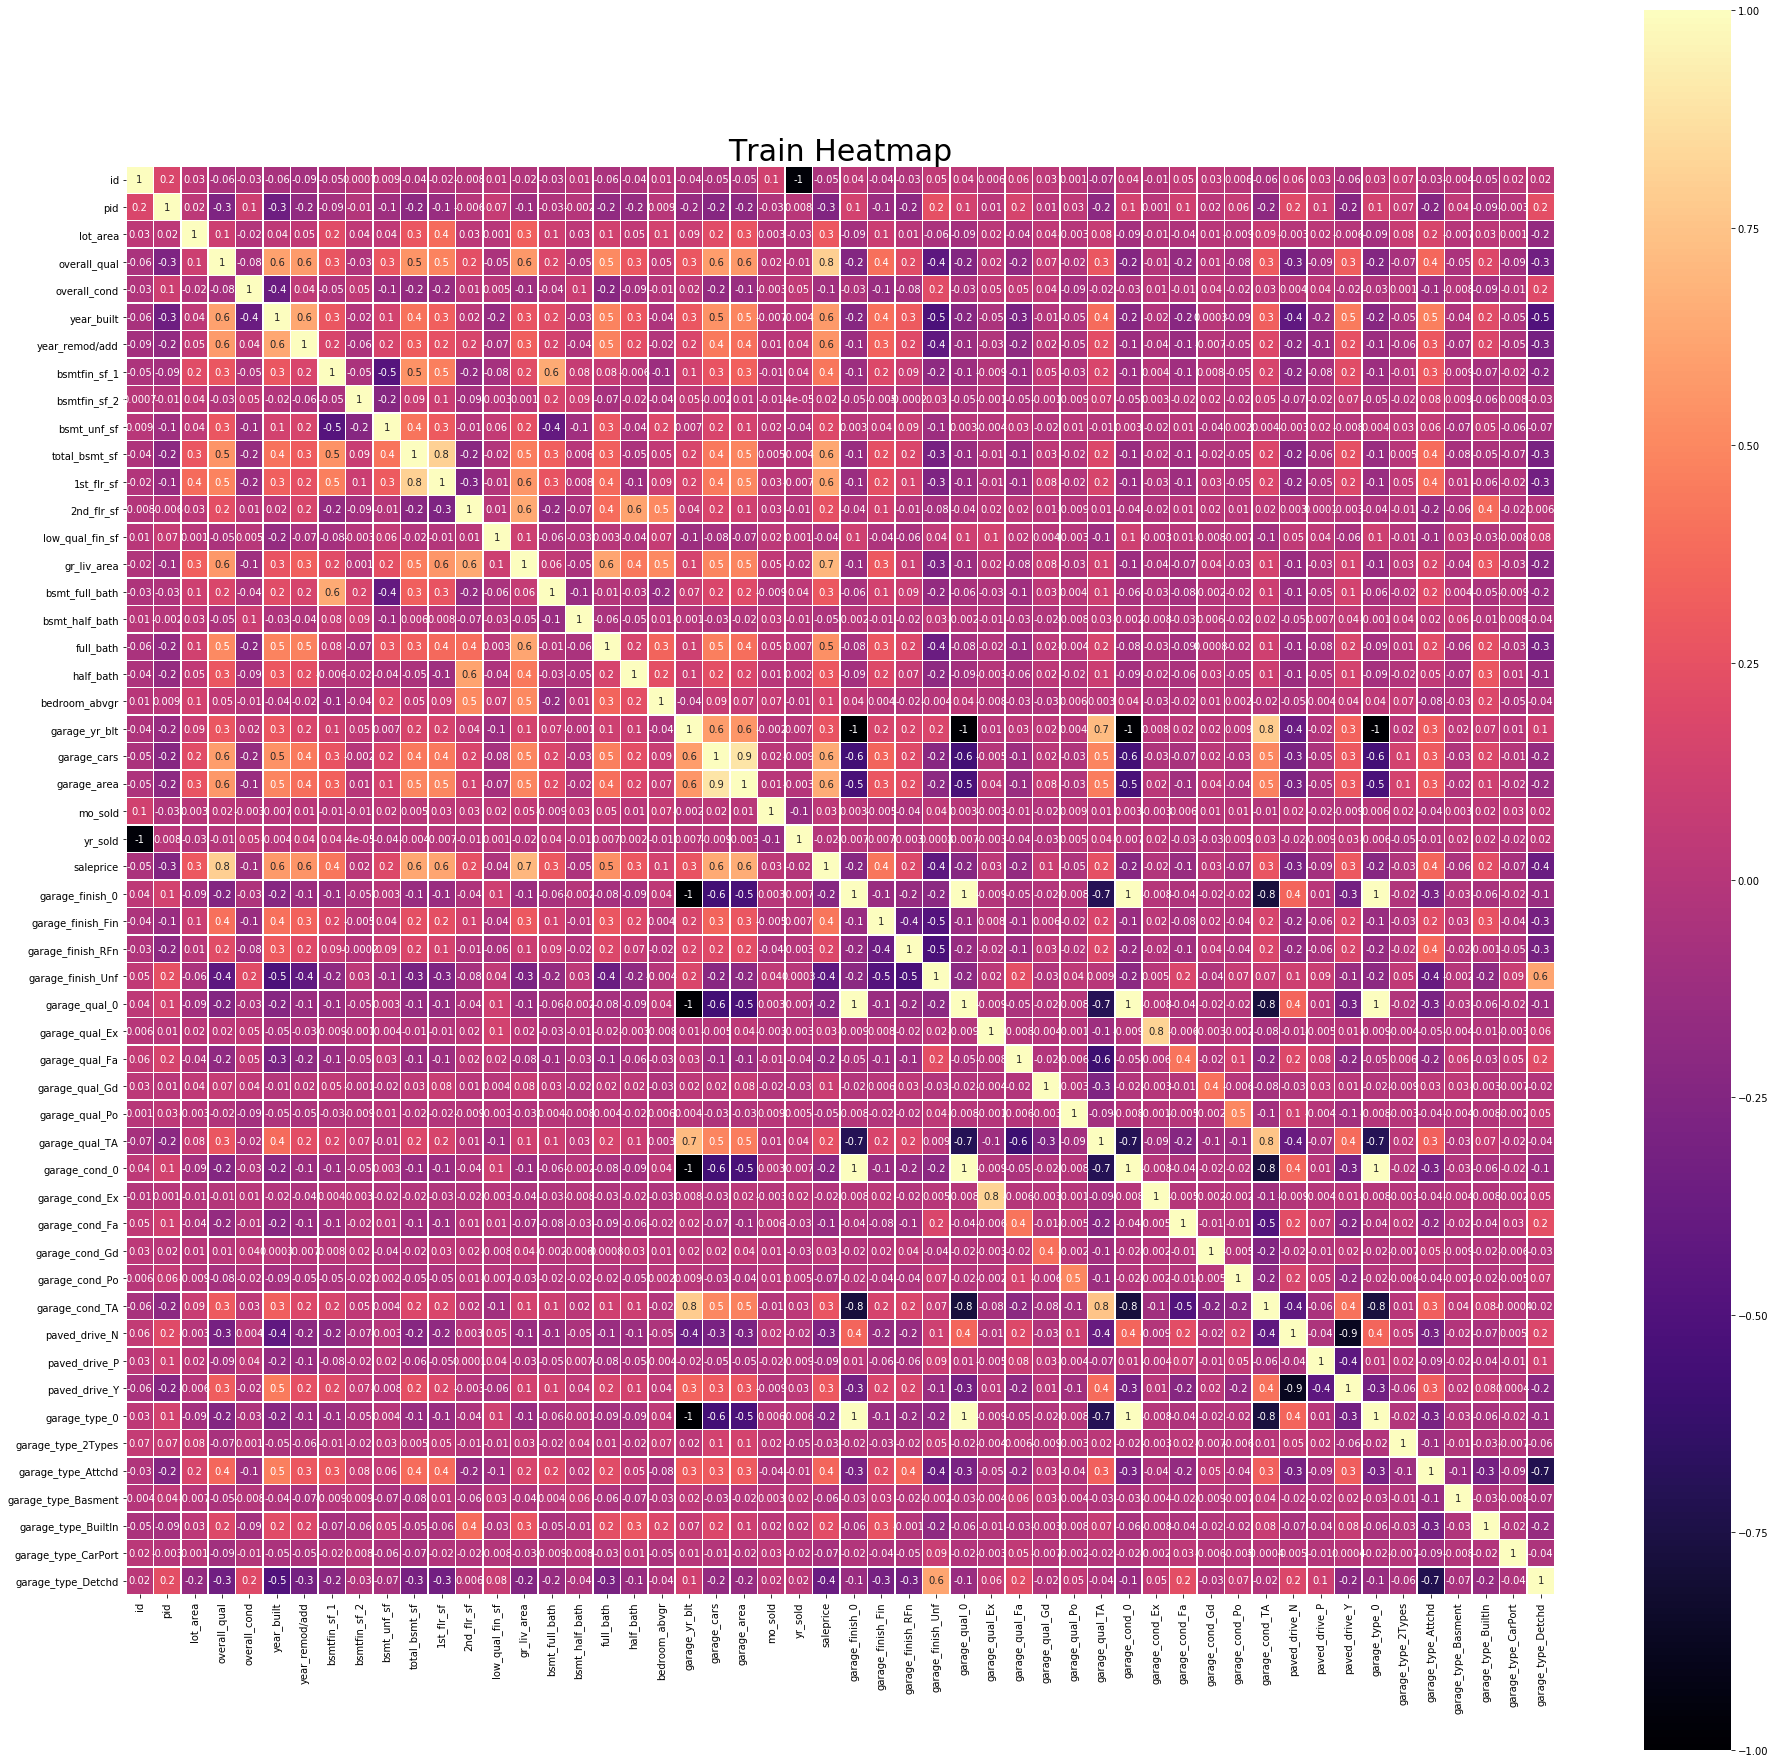

In [20]:
# Seaborne Heatmap Code sourced from Project 1

plt.figure(figsize=(32, 32))

# Mask to remove upper triangle sourced from class code
mask = np.triu(np.ones_like(train.corr(), dtype=np.bool))
ax = plt.axes()


sns.heatmap(corr, 
            annot=True, 
            cmap="magma", 
            vmax=1.0, 
            vmin=-1.0, 
            square=True,
            linewidths=0.5,
            fmt='.1g',
            ax=ax);

ax.set_title('Train Heatmap', fontsize=30);

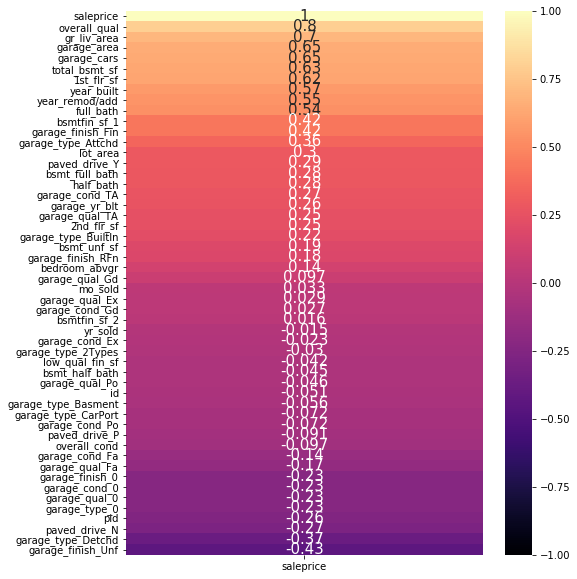

In [21]:
# Correlation heatmap of the features with our target varible (saleprice)
plt.figure(figsize=(8, 10))
sns.heatmap(train.corr()[['saleprice']].sort_values('saleprice', ascending=False),
           annot=True,
            cmap='magma',
            annot_kws={'fontsize':15},
            vmin=-1,
            vmax=1
           );

In [81]:
# Define features you want to train model with
garage_features = ['saleprice',
                   'garage_area', 
            'garage_cars', 
            'garage_yr_blt',
            'garage_finish_Fin', 
            'garage_finish_RFn', 
            'garage_finish_Unf', 
            'garage_qual_Ex', 
            'garage_qual_Fa', 
            'garage_qual_Gd', 
            'garage_qual_Po', 
            'garage_qual_TA', 
            'garage_cond_Ex',       
            'garage_cond_Fa', 
            'garage_cond_Gd', 
            'garage_cond_Po', 
            'garage_cond_TA', 
            'paved_drive_P', 
            'paved_drive_Y', 
            'garage_type_2Types',
            'garage_type_Attchd', 
            'garage_type_Basment', 
            'garage_type_BuiltIn',
            'garage_type_CarPort', 
            'garage_type_Detchd'
           ]

In [90]:
# Create dataframe of just Garage features. 
train_garage = train[garage_features]
train_garage.head(2)

,saleprice,garage_area,garage_cars,garage_yr_blt,garage_finish_Fin,garage_finish_RFn,garage_finish_Unf,garage_qual_Ex,garage_qual_Fa,garage_qual_Gd,garage_qual_Po,garage_qual_TA,garage_cond_Ex,garage_cond_Fa,garage_cond_Gd,garage_cond_Po,garage_cond_TA,paved_drive_P,paved_drive_Y,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd
0,130500,475.0,2.0,1976.0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0
1,220000,559.0,2.0,1997.0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0


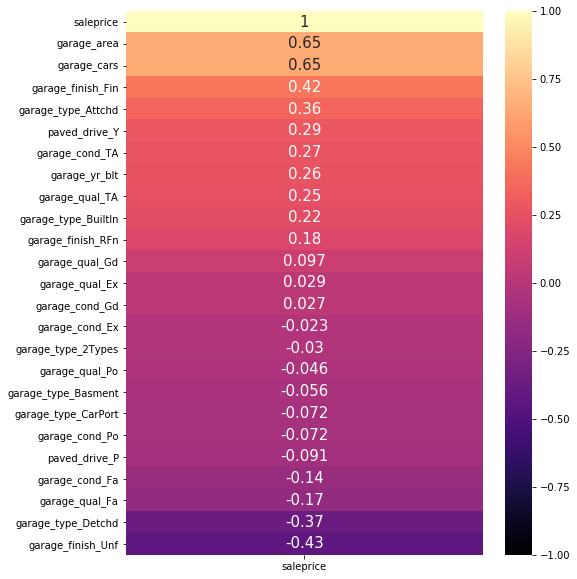

In [84]:
# Correlation heatmap of the features with our target varible (saleprice) Garage specific
plt.figure(figsize=(8, 10))
sns.heatmap(train_garage.corr()[['saleprice']].sort_values('saleprice', ascending=False),
           annot=True,
            cmap='magma',
            annot_kws={'fontsize':15},
            vmin=-1,
            vmax=1
           );

## Defining Features

In [22]:
# Checking columns left in the dataframe. This will be use to create the features list. 
train.columns

Index(['id', 'pid', 'lot_area', 'neighborhood', 'bldg_type', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'bsmtfin_sf_1',
       'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'garage_yr_blt', 'garage_cars', 'garage_area', 'mo_sold', 'yr_sold',
       'saleprice', 'garage_finish_0', 'garage_finish_Fin',
       'garage_finish_RFn', 'garage_finish_Unf', 'garage_qual_0',
       'garage_qual_Ex', 'garage_qual_Fa', 'garage_qual_Gd', 'garage_qual_Po',
       'garage_qual_TA', 'garage_cond_0', 'garage_cond_Ex', 'garage_cond_Fa',
       'garage_cond_Gd', 'garage_cond_Po', 'garage_cond_TA', 'paved_drive_N',
       'paved_drive_P', 'paved_drive_Y', 'garage_type_0', 'garage_type_2Types',
       'garage_type_Attchd', 'garage_type_Basment', 'garage_type_BuiltIn',
       'garage_type_CarPort', 'garage_type_Detchd'

In [23]:
# Define features you want to train model with. 
features = ['overall_qual', 
            'gr_liv_area', 
            'garage_area', 
            'garage_cars', 
            'garage_yr_blt',
            'total_bsmt_sf', 
            '1st_flr_sf', 
            'year_built', 
            'year_remod/add', 
            'full_bath', 
            'bsmtfin_sf_1', 
            'garage_finish_Fin', 
            'garage_finish_RFn', 
            'garage_finish_Unf', 
            'garage_qual_Ex', 
            'garage_qual_Fa', 
            'garage_qual_Gd', 
            'garage_qual_Po', 
            'garage_qual_TA', 
            'garage_cond_Ex',       
            'garage_cond_Fa', 
            'garage_cond_Gd', 
            'garage_cond_Po', 
            'garage_cond_TA', 
            'paved_drive_P', 
            'paved_drive_Y', 
            'garage_type_2Types',
            'garage_type_Attchd', 
            'garage_type_Basment', 
            'garage_type_BuiltIn',
            'garage_type_CarPort', 
            'garage_type_Detchd'
           ]

In [24]:
# Set X/y variables for features
X = train[features] # Capital X because it's a features matrix
y = train['saleprice']

## Train Test Split

In [25]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [26]:
# Check shapes
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1538, 32)
(1538,)
(513, 32)
(513,)


## Intantiate Model and Fit to Training Data

In [27]:
# Instantiate model
lr=LinearRegression()

# Fit model to training data
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Baseline Predictions and Evaluation (MSE, RMSE, $R^2$)

In [28]:
# Create preditions - Baseline
y_preds = lr.predict(X)

In [29]:
# Mean Squared Error - Baseline
MSE_baseline = mean_squared_error(y, y_preds)
MSE_baseline

1275396103.7407243

In [30]:
# Root Mean Squared Error - Baseline
np.sqrt(MSE_baseline)

35712.68827378757

In [31]:
# Rsquared - Baseline
r2_score(y, y_preds)

0.7968749706169501

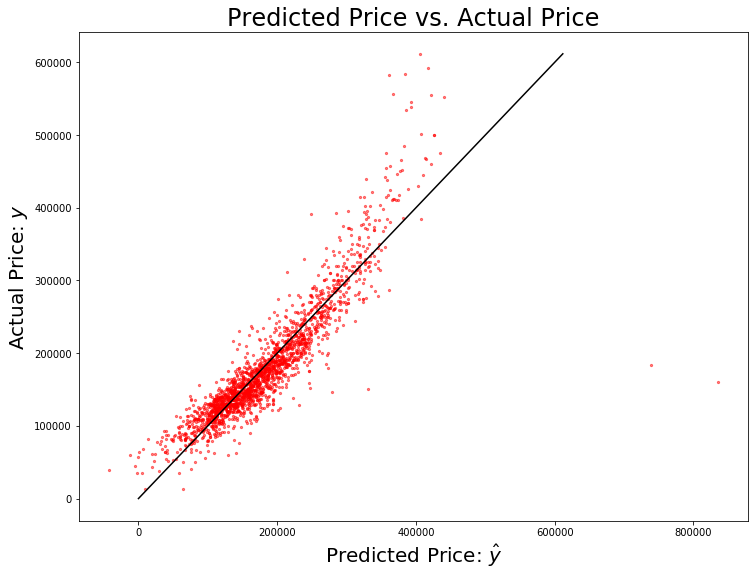

In [32]:
# Plot the model
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_preds, y, s=5, color='red', alpha = 0.5)

# Plot a line.
plt.plot([0, np.max(y)],
         [0, np.max(y)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Price: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Price: $y$", fontsize = 20)
plt.title('Predicted Price vs. Actual Price', fontsize = 24);

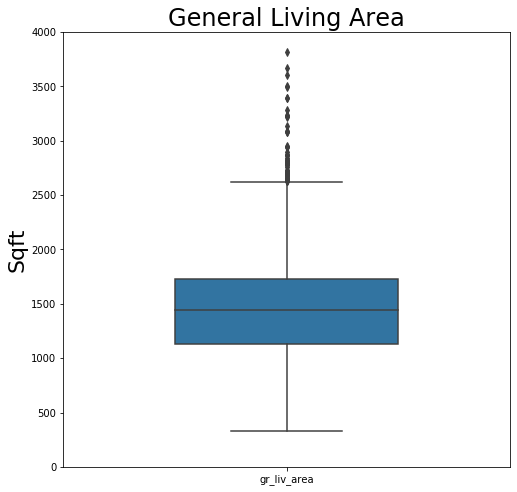

In [34]:
# General Living Area Boxplot
plt.subplots(figsize = (8,8))

sns.boxplot(data = train[['gr_liv_area']], width = 0.5);
plt.title('General Living Area', fontsize = 24)
plt.ylabel('Sqft', fontsize = 22)
plt.ylim(0, 4000)
plt.xticks(rotation = 0);

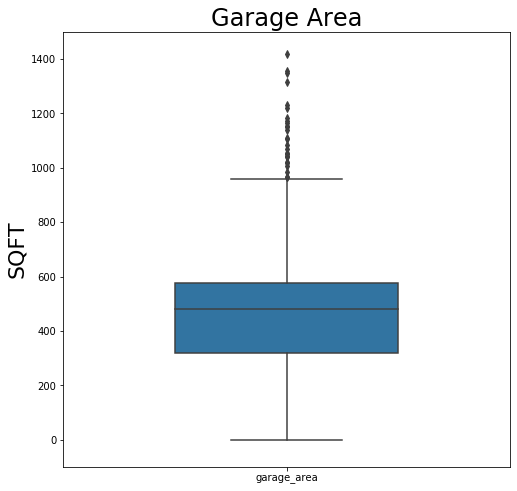

In [35]:
# Garage Area Boxplot
plt.subplots(figsize = (8,8))

sns.boxplot(data = train[['garage_area']], width = 0.5);
plt.title('Garage Area', fontsize = 24)
plt.ylabel('SQFT', fontsize = 22)
plt.ylim(-100, 1500)
plt.xticks(rotation = 0);

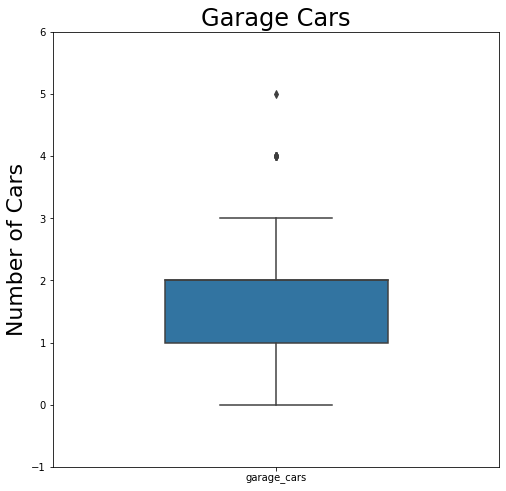

In [36]:
# Garage Car Boxplot
plt.subplots(figsize = (8,8))

sns.boxplot(data = train[['garage_cars']], width = 0.5);
plt.title('Garage Cars', fontsize = 24)
plt.ylabel('Number of Cars', fontsize = 22)
plt.ylim(-1, 6)
plt.xticks(rotation = 0);

## Test / Train Predictions

In [37]:
# Let's create predicdtions! (using the testing)
preds_test = lr.predict(X_test)
preds_train = lr.predict(X_train)

## MSE Test / Train

In [38]:
# MSE for training
mse_train = mean_squared_error(y_train, preds_train)
mse_train

901929776.2264344

In [39]:
# MSE for testing
mse_test = mean_squared_error(y_test, preds_test)
mse_test

2395067081.7465296

## RMSE Test / Train

In [40]:
# Lets check the RMSE for testing
np.sqrt(mean_squared_error(y_test, preds_test))

48939.42257267171

In [41]:
# Lets check the RMSE for training
np.sqrt(mean_squared_error(y_train, preds_train))

30032.145714657723

## $R^2$ Score Test / Train

In [42]:
# Rsquared - train
r2_score(y_train, preds_train)

0.8564561430268005

In [43]:
# Rsquared - test
r2_score(y_test, preds_test)

0.6176545210709385

## Scoring

In [44]:
# Train Score
lr.score(X_train, y_train)

0.8564561430268005

In [45]:
# Test Score
lr.score(X_test, y_test)

0.6176545210709385

In [46]:
# Cross Val score
cross_val_score(lr, X_train, y_train, cv=5)

array([0.85109279, 0.84862147, 0.83159983, 0.85800665, 0.86585798])

In [47]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=5).mean()
lr_scores

0.8510357448912478

## Lasso

In [48]:
lasso = LassoCV(n_alphas=200)

In [49]:
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=3)
lasso_scores.mean()

0.803505461613735

## Ridge

In [50]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [51]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=3)
ridge_scores.mean()

0.8514942362824236

### Stats Models

In [87]:
# Run statsmodels on X and y
train_stats = sm.OLS(y, X).fit()

In [88]:
# Pvalue for Age is on the bottom of the summary page. 
train_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              saleprice   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              2080.
Date:                Thu, 14 May 2020   Prob (F-statistic):                        0.00
Time:                        22:19:51   Log-Likelihood:                         -24374.
No. Observations:                2051   AIC:                                  4.881e+04
Df Residuals:                    2021   BIC:                                  4.898e+04
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
overall_qual         2.144e+04    887.735     24.149      0.000    1.97e+04    2.32e+04
gr_liv_area            37.7344      2.572     14.672      0.000      32.691      42.778
garage_area            35.0683      9.036      3.881      0.000      17.348      52.789
garage_cars          1.142e+04   2611.914      4.374      0.000    6300.990    1.65e+04
garage_yr_blt         160.6870     51.072      3.146      0.002      60.527     260.847
total_bsmt_sf           9.8506      3.389      2.907      0.004       3.205      16.496
1st_flr_sf             15.5778      3.849      4.048      0.000       8.030      23.125
year_built            -65.7830     41.186     -1.597      0.110    -146.555      14.989
year_remod/add         31.8499     40.592      0.785      0.433     -47.757     111.457
full_bath           -1332.7520   2080.383     -0.641      0.522   -5412.671    2747.167
bsmtfin_sf_1           20.7820      2.092      9.934      0.000      16.679      24.885
garage_finish_Fin   -1.497e+05    4.8e+04     -3.122      0.002   -2.44e+05   -5.57e+04
garage_finish_RFn   -1.577e+05   4.78e+04     -3.302      0.001   -2.51e+05    -6.4e+04
garage_finish_Unf   -1.607e+05   4.74e+04     -3.388      0.001   -2.54e+05   -6.77e+04
garage_qual_Ex      -6124.2238   4.17e+04     -0.147      0.883   -8.79e+04    7.56e+04
garage_qual_Fa      -1.098e+05   2.94e+04     -3.735      0.000   -1.67e+05   -5.22e+04
garage_qual_Gd      -9.078e+04   3.12e+04     -2.910      0.004   -1.52e+05   -2.96e+04
garage_qual_Po      -1.452e+05   3.74e+04     -3.881      0.000   -2.19e+05   -7.18e+04
garage_qual_TA      -1.162e+05   3.01e+04     -3.859      0.000   -1.75e+05   -5.72e+04
garage_cond_Ex      -1.854e+05   4.58e+04     -4.048      0.000   -2.75e+05   -9.56e+04
garage_cond_Fa      -6.691e+04   3.02e+04     -2.216      0.027   -1.26e+05   -7697.536
garage_cond_Gd      -7.876e+04   3.12e+04     -2.524      0.012    -1.4e+05   -1.76e+04
garage_cond_Po      -6.779e+04   3.22e+04     -2.103      0.036   -1.31e+05   -4576.774
garage_cond_TA      -6.928e+04   3.03e+04     -2.286      0.022   -1.29e+05   -9832.726
paved_drive_P       -5068.6737   6476.671     -0.783      0.434   -1.78e+04    7632.975
paved_drive_Y        1125.8091   3622.089      0.311      0.756   -5977.608    8229.226
garage_type_2Types  -1.838e+04   3.66e+04     -0.502      0.616   -9.02e+04    5.34e+04
garage_type_Attchd   1.172e+04   3.57e+04      0.328      0.743   -5.83e+04    8.17e+04
garage_type_Basment -1208.0636   3.63e+04     -0.033      0.973   -7.24e+04       7e+04
garage_type_BuiltIn  2.547e+04   3.59e+04      0.710      0.478   -4.49e+04    9.58e+04
garage_type_CarPort -2822.0987   3.72e+04     -0.076      0.940   -7.59e+04    7

# Import Test File

In [54]:
# Load in test csv file
test = pd.read_csv('datasets/test.csv')

In [55]:
# Checking
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [56]:
# Create empty column for saleprice
test['saleprice'] = ""

In [57]:
# dropped all functions
test.drop(columns = ['MS SubClass', 
                      'MS Zoning',
                      'Lot Frontage', 
                      'Street', 
                      'Alley', 
                      'Lot Shape', 
                      'Land Contour', 
                      'Utilities', 
                      'Lot Config', 
                      'Land Slope', 
                      'Condition 1', 
                      'Condition 2', 
                      'Roof Style', 
                      'Roof Matl', 
                      'Exterior 1st',
                      'Exterior 2nd', 
                      'Mas Vnr Area',
                      'Mas Vnr Type',
                      'Exter Qual', 
                      'Bsmt Qual', 
                      'Bsmt Cond', 
                      'Bsmt Exposure', 
                      'BsmtFin Type 1', 
                      'BsmtFin Type 2',
                      'Heating', 
                      'Heating QC', 
                      'Central Air', 
                      'Electrical', 
                      'Functional', 
                      'Foundation', 
                      'Exter Cond', 
                      'House Style', 
                      'Pool QC', 
                      'Kitchen Qual', 
                      'Fireplace Qu', 
                      'Fence', 
                      'Sale Type', 
                      'Misc Feature', 
                     '3Ssn Porch', 
                     'Enclosed Porch', 
                     'Screen Porch', 
                     'Pool Area', 
                     'Misc Val', 
                     'Wood Deck SF', 
                     'Fireplaces', 
                     'Kitchen AbvGr', 
                      'TotRms AbvGrd', 
                      'Open Porch SF'
                     ], 
           inplace=True) 

In [58]:
# Lowercase and replace spaces with '_'. 
test.columns = [i.replace(' ', '_').lower() for i in test.columns]

In [59]:
# Check for nulls
test.isnull().sum()

id                  0
pid                 0
lot_area            0
neighborhood        0
bldg_type           0
overall_qual        0
overall_cond        0
year_built          0
year_remod/add      0
bsmtfin_sf_1        0
bsmtfin_sf_2        0
bsmt_unf_sf         0
total_bsmt_sf       0
1st_flr_sf          0
2nd_flr_sf          0
low_qual_fin_sf     0
gr_liv_area         0
bsmt_full_bath      0
bsmt_half_bath      0
full_bath           0
half_bath           0
bedroom_abvgr       0
garage_type        44
garage_yr_blt      45
garage_finish      45
garage_cars         0
garage_area         0
garage_qual        45
garage_cond        45
paved_drive         0
mo_sold             0
yr_sold             0
saleprice           0
dtype: int64

In [60]:
# Test features are the same as train features
test_features = features

In [61]:
# Create dummies same as train
test = pd.get_dummies(test, columns=['garage_finish'], drop_first=False)
test = pd.get_dummies(test, columns=['garage_qual'], drop_first=False)
test = pd.get_dummies(test, columns=['garage_cond'], drop_first=False)
test = pd.get_dummies(test, columns=['paved_drive'], drop_first=False)
test = pd.get_dummies(test, columns=['garage_type'], drop_first=False)

Source: Clint for troubleshooting

In [62]:
# Create empty dummy column because it wasn't generated with get_dummies
test['garage_qual_Ex'] = 0

In [63]:
# Checking
test.head()

,id,pid,lot_area,neighborhood,bldg_type,overall_qual,overall_cond,year_built,year_remod/add,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,garage_yr_blt,garage_cars,garage_area,mo_sold,yr_sold,saleprice,garage_finish_Fin,garage_finish_RFn,garage_finish_Unf,garage_qual_Fa,garage_qual_Gd,garage_qual_Po,garage_qual_TA,garage_cond_Ex,garage_cond_Fa,garage_cond_Gd,garage_cond_Po,garage_cond_TA,paved_drive_N,paved_drive_P,paved_drive_Y,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_qual_Ex
0,2658,902301120,9142,OldTown,2fmCon,6,8,1910,1950,0,0,1020,1020,908,1020,0,1928,0,0,2,0,4,1910.0,1,440,4,2006,,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,2718,905108090,9662,Sawyer,Duplex,5,4,1977,1977,0,0,1967,1967,1967,0,0,1967,0,0,2,0,6,1977.0,2,580,8,2006,,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
2,2414,528218130,17104,Gilbert,1Fam,7,5,2006,2006,554,0,100,654,664,832,0,1496,1,0,2,1,3,2006.0,2,426,9,2006,,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
3,1989,902207150,8520,OldTown,1Fam,5,6,1923,2006,0,0,968,968,968,0,0,968,0,0,1,0,2,1935.0,2,480,7,2007,,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,625,535105100,9500,NAmes,1Fam,6,5,1963,1963,609,0,785,1394,1394,0,0,1394,1,0,1,1,3,1963.0,2,514,7,2009,,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0


In [64]:
# Create new X for test(submission)
test_X = test[test_features]

In [65]:
# Remove nulls
test_X.fillna(0, inplace=True)

C:\Users\Jason\anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Source: Dan

In [66]:
# Predict off of old linear regression (for X_train)
predicted_prices = lr.predict(test_X)

In [67]:
# Create dataframe via dictionary. 
jason_submission = pd.DataFrame({'Id': test['id'], 'SalePrice' : predicted_prices})

In [68]:
jason_submission

,Id,SalePrice
0,2658,118454.083934
1,2718,214178.093309
2,2414,187352.430697
3,1989,127820.379748
4,625,183458.117813
...,...,...
873,1662,200994.506979
874,1234,205140.738999
875,1373,127464.109346
876,1672,104591.924651


In [69]:
cd desktop\GA DSI\Submissions\Projects\project_2\

[WinError 3] The system cannot find the path specified: 'desktop\\GA DSI\\Submissions\\Projects\\project_2\\'
C:\Users\Jason\Desktop\ga dsi\Submissions\Projects\project_2


In [70]:
jason_submission.to_csv('datasets\submission.csv', index=False)